# Clustering and Cluster Validation

# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

## Main Concept:
The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.

To measure density of a region:
- __Density at a point P:__ Number of points within a circle of Radius Eps (ϵ) from point P.
- __Dense Region:__ For each point in the cluster, the circle with radius ϵ contains at least minimum number of points (MinPts).

The Epsilon neighborhood of a point P in the database D is defined as:

                            N (p) = {q ∈ D | dist(p, q) ≤ ϵ}

Following the definition of dense region, a point can be classified as a
1. __Core Point__ if |N (p)|≥ MinPts. The Core Points, as the name suggests, lie usually within the interior of a cluster. 
2. __Border Point__ has fewer than MinPts within its ϵ-neighborhood (N), but it lies in the neighborhood of another core point. 
3. __Noise__ is any data point that is neither core nor border point.

![image1.png](images/dbscan_points.png)


__Directly Density Reachable:__ Data-point a is directly density reachable from a point b if -
1. |N (b)|≥ MinPts; i.e. b is a core point.
2. a ∈ N(b) i.e. a is in the epsilon neighborhood of b.

Considering a border point and a core point, we can understand that notion of directly density reachable is not symmetric, because even though the core point falls in the epsilon neighborhood of border point, the border point doesn’t have enough MinPts, and thus fail to satisfy both conditions.

## Steps of DBSCAN Algorithm
1. The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the ϵ parameter.
2. If this point contains MinPts within ϵ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.
3. If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.
4. The above process continues until the density-connected cluster is completely found.
5. The process restarts with a new point which can be a part of a new cluster or labeled as noise.


### Libraries useful for DBSCAN

    To load dataset:    import pandas as pd
    Preprocessing:      from sklearn import preprocessing
    ploting graph:      import matplotlib.pyplot as plt
    numpy:              import numpy as np
    DBSCAN:             from sklearn.cluster import DBSCAN
    Agglomerative:      from sklearn.cluster import AgglomerativeClustering
    dendograms:         import scipy.cluster.hierarchy as shc
    for evaluations:    from sklearn import metrics
    plot the graph:     %matplotlib inline

In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn import metrics


### Load the "s1_modified_labelled " data

In [17]:
#load the dataset
df = pd.read_csv("s1_modified_labelled.csv")
df.head()

,x,y,Class
0,844536,424646,0
1,870801,476330,0
2,878184,487392,0
3,846693,429031,0
4,777811,751059,0


### Q1. Perform pre-processing (if required)

In [18]:
X = df[['x','y']]
y = df[['Class']]
print(X.head())
print(y.head())

        x       y
0  844536  424646
1  870801  476330
2  878184  487392
3  846693  429031
4  777811  751059
   Class
0      0
1      0
2      0
3      0
4      0


In [19]:
# for s1_modified

X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 1.20213074, -0.51212622],
       [ 1.31602212, -0.23187887],
       [ 1.34803659, -0.17189713],
       [ 1.21148401, -0.48834933],
       [ 0.91279504,  1.25779058]])

### Q2. Apply DBSCAN Algorithm using Scikit-Learn taking eps=0.3 and mininimum samples = 50

In [78]:
dbscan = DBSCAN(eps=0.3,min_samples=50)

clustering = dbscan.fit(X)

dbscanlabels = clustering.labels_
print(labels[0:5])

[-1 -1 -1 -1  0]


### Q3. Plot the clusters.

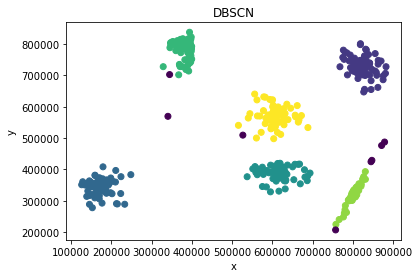

In [79]:
import matplotlib.pyplot as plt


plt.scatter(df["x"], df["y"], c=labels)
plt.title("DBSCN")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



# K-means Clustering

### Q4. Apply K-means with k=5

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(X)

klabels = kmeans.labels_


In [27]:
print(klabels[0:5])

[2 2 2 2 4]


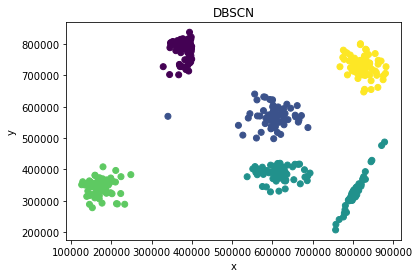

In [28]:
#Plot the clusters
plt.scatter(df["x"], df["y"], c=klabels)
plt.title("K-means")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



# Hierarchical Clustering

### Q5. Apply agglomerative clustering with single link and plot the clusters

[0 0 0 0 3]


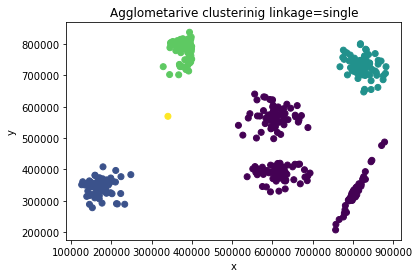

In [233]:
single = AgglomerativeClustering( n_clusters=5, linkage='single').fit(X)

slabels = single.labels_

print(agglabels[0:5])

plt.scatter(df["x"], df["y"], c=slabels)
plt.title("Agglometarive clusterinig linkage=single")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### Q6. Apply agglomerative clustering using wards method and plot their clusters

[0 0 0 0 3]


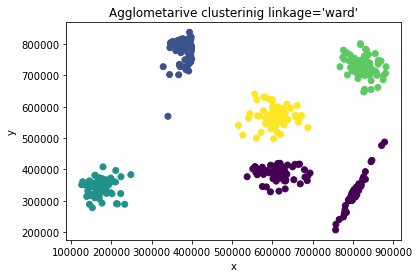

In [234]:
# wards method linkage
ward = AgglomerativeClustering( n_clusters=5, linkage='ward').fit(X)

wlabels = ward.labels_

print(agglabels[0:5])

plt.scatter(df["x"], df["y"], c=wlabels)
plt.title("Agglometarive clusterinig linkage='ward'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Q7. Apply agglomerative clustering using complete link and plot their clusters

[0 0 0 0 3]


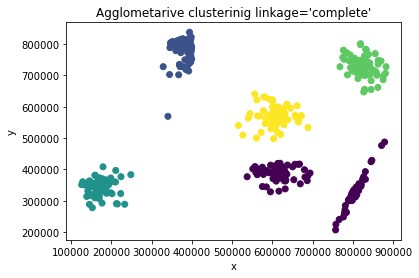

In [235]:
# complete linkage
complete = AgglomerativeClustering( n_clusters=5, linkage='complete').fit(X)

clabels = complete.labels_

print(agglabels[0:5])

plt.scatter(df["x"], df["y"], c=clabels)
plt.title("Agglometarive clusterinig linkage='complete'")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Q8. Find the number of clusters in each case.

In [236]:
print("Clusters by using linkage = single:", len(np.unique(single.labels_)))
print("Clusters by using linkage = ward:", len(np.unique(ward.labels_)))

print("Clusters by using linkage = complete:", len(np.unique(complete.labels_)))


Clusters by using linkage = single: 5
Clusters by using linkage = ward: 5
Clusters by using linkage = complete: 5


# Cluster Validation

### Q9. Calculate the silhouette score for each datapoint

In [237]:
from sklearn.metrics import silhouette_score

s = silhouette_score(X, y)
print(s)

0.7873506649301831


c:\users\vinay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Q10. Calculate the silhouette  score for each cluster in case of K-means, dbscan, single link, complete link and wards method

In [238]:
print("silhouette score for dbscan: ", silhouette_score(X, dbscanlabels)) 
print("silhouette score for kmeans: ", silhouette_score(X, klabels)) 
print("silhouette score for single link: ", silhouette_score(X, slabels)) 
print("silhouette score for complete link: ", silhouette_score(X, clabels)) 
print("silhouette score for ward link: ", silhouette_score(X, wlabels)) 



silhouette score for dbscan:  0.7903913298876738
silhouette score for kmeans:  0.7310655665309354
silhouette score for single link:  0.6242224527925081
silhouette score for complete link:  0.7300817244385374
silhouette score for ward link:  0.7300817244385374


### Q11. Calculate the mean silhouette  score for all the clustering techniques mentioned in q10.

In [239]:
np.mean([silhouette_score(X, dbscanlabels),silhouette_score(X, klabels), silhouette_score(X, slabels), silhouette_score(X, wlabels),silhouette_score(X, clabels)] )

0.7211685596176384

### Q12. Find the correlation between all the datapoints and plot a heat map for the same.

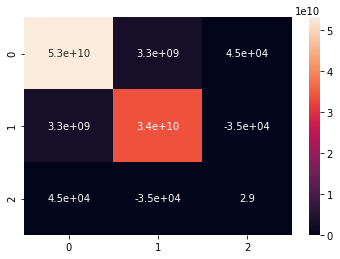

In [240]:
# take transpose of the dataframe
import seaborn as sns


X1 = X.T

covMatrix = np.cov(df.T,bias=True)
sns.heatmap(covMatrix, annot=True)
plt.show()




In [242]:
#import seaborn as sns


### Q13. Create the cluster membership matrix for the dbscan, k-means and agglomerative clustering. Compare it with the heat map.

In [243]:
# dbscan

from sklearn.metrics import adjusted_rand_score as rs

dbscanrs = rs(dbscanlabels,list(y['Class']))
print( "DBSCAN: ", dbscanrs)


DBSCAN:  0.9795623944211288


In [244]:
# kmeans
k = rs(klabels, list(y['Class']))
print( "Kmeans: ",k)


Kmeans:  0.7926245040773887


In [245]:
# single link
slrs = rs(slabels, list(y['Class']))
print( "Kmeans: ",slrs)


Kmeans:  0.5426702782345221


### Q14. Calculate the rand index for all the clustering techniques. Which method has the highest rand index for the dataset.

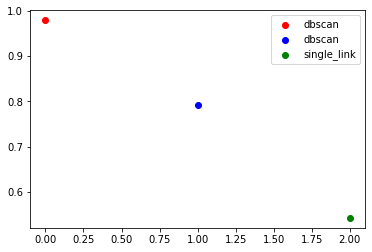

[0.9795623944211288, 0.7926245040773887, 0.5426702782345221]


In [246]:

l = [dbscanrs, k, slrs]


plt.scatter(0, dbscanrs, c='r', label='dbscan')
plt.scatter(1, k, c='b', label='dbscan')
plt.scatter(2, slrs, c='g', label='single_link')
plt.legend()
plt.show()


print(l)

# dbscan has high score

### Q15. Plot the dendrograms for single link and wards method. Find the agglomerative level which gives the natural number of clusters

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

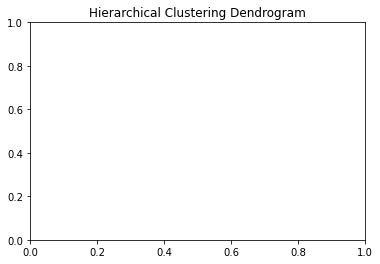

In [247]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(complete, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [ ]:
# Plot the graph for inverse skee method
